Домашнее задание к лекции «Корреляция и корреляционный анализ»

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [227]:

df = pd.read_csv("C:\\Users\\Мария\\Desktop\\water.csv")
df.tail()

,Unnamed: 0,location,town,mortality,hardness
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81
60,61,North,York,1378,71


Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

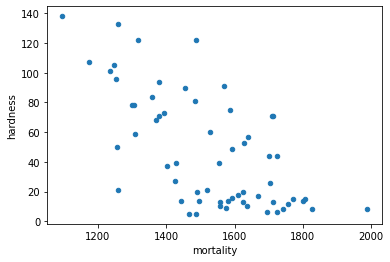

In [228]:
#Построим точечный график
df.plot(kind='scatter', x='mortality' ,y='hardness' )

In [229]:
#Считаем коэфицент корреляции Пирсона
df[['mortality','hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [230]:
#Считаем коэфицент корреляции Спирмана
df[['mortality','hardness']].corr(method='spearman')


,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [231]:
#Считаем коэфицент корреляции Кендэлла
df[['mortality','hardness']].corr(method='kendall')


,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [232]:
df[['mortality','hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [234]:
X = df[['mortality']]
y = df['hardness']

In [235]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=42)

In [236]:
X_train.shape
y_train.shape

(40,)

In [237]:

model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [238]:
print(f"""В общем виде функция линейной регрессии: 
{chr(947)}={round(model.intercept_,2)}{round(model.coef_[0], 2)}{chr(967)}""")

В общем виде функция линейной регрессии: 
γ=238.75-0.13χ


In [239]:
y_prediction = model.predict(X_test)
print(*y_prediction, sep=' ')

81.3878671317089 42.14261766972035 50.09261997230968 23.971183835230477 73.81643636733813 33.687853316172976 79.87358097883475 38.48309280027448 47.06404766656135 24.72832691166755 73.5640553418591 51.3545250997048 42.5211892079389 11.604513586758202 23.087850246053875 58.54738432585705 32.17356716329883 10.7211799975816 82.77596277184355 35.706901520005175 37.97833074931643


In [240]:
print(len(X_test))
type(X_test)

21


pandas.core.frame.DataFrame

In [241]:
model.score(X_test, y_test) 

0.49625952500650994

In [242]:
a = X_test.iloc[1::]
y = list(y_prediction)

In [243]:
print(a['mortality'], y, sep='\n')

5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
8     1637
6     1807
41    1236
4     1609
44    1591
Name: mortality, dtype: int64
[81.3878671317089, 42.14261766972035, 50.09261997230968, 23.971183835230477, 73.81643636733813, 33.687853316172976, 79.87358097883475, 38.48309280027448, 47.06404766656135, 24.72832691166755, 73.5640553418591, 51.3545250997048, 42.5211892079389, 11.604513586758202, 23.087850246053875, 58.54738432585705, 32.17356716329883, 10.7211799975816, 82.77596277184355, 35.706901520005175, 37.97833074931643]


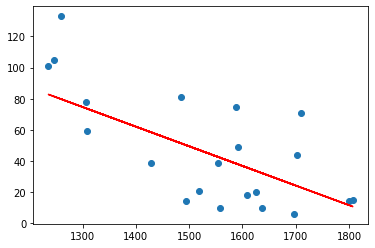

In [244]:
plt.scatter(X_test, y_test)
plt.plot(X_test['mortality'], list(y_prediction), c='r')



In [245]:

print(f"Коэфицент детерминанции {round(model.score(X_test, y_test), 3)}")

Коэфицент детерминанции 0.496


In [246]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [247]:
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     24.89
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.38e-05
Time:                        14:10:49   Log-Likelihood:                -192.87
No. Observations:                  40   AIC:                             389.7
Df Residuals:                      38   BIC:                             393.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        238.7474     38.764      6.159      0.0

C:\ProgramData\ANC\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [248]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)


Parameters:  const        238.747437
mortality     -0.126191
dtype: float64
R2:  0.39574163689733977


(array([3., 1., 9., 4., 6., 6., 5., 2., 3., 1.]),
 array([-58.74739047, -45.79548488, -32.84357929, -19.8916737 ,
         -6.93976811,   6.01213747,  18.96404306,  31.91594865,
         44.86785424,  57.81975983,  70.77166541]),
 <BarContainer object of 10 artists>)

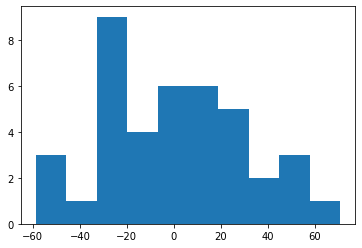

In [249]:
plt.hist(results.resid)

Диаграмма остатков близка к нормальному распределению

Задание 2. Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
+Построить точечный график 
+Рассчитать коэффициенты корреляции Пирсона и Спирмена 
-Построить модель линейной регрессии 
-Рассчитать коэффициент детерминации 
-Вывести график остатков

In [250]:
df_s = df.loc[df.location == 'South']
df_n = df.loc[df.location == 'North']

In [251]:
df_s.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

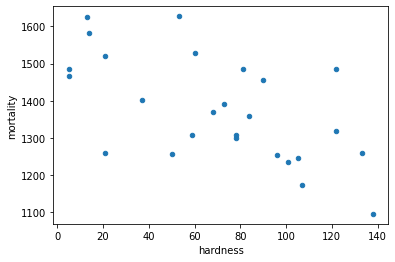

In [252]:
# Построить точечный график для южных городов
df_s.plot(kind='scatter', x='hardness', y='mortality')

<AxesSubplot:title={'center':'Зависимость смертности и уровня жесткости воды в южных городах '}, xlabel='hardness', ylabel='mortality'>

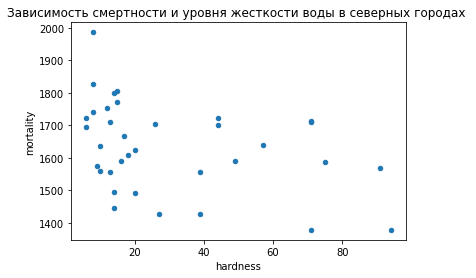

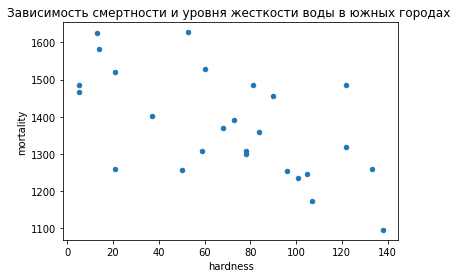

In [274]:
df_n = df.loc[df.location == 'North']
df_s = df.loc[df.location == 'South']
df_n.plot(kind='scatter', x='hardness', y='mortality',title='Зависимость смертности и уровня жесткости воды в северных городах ')
df_s.plot(kind='scatter', x='hardness', y='mortality',title='Зависимость смертности и уровня жесткости воды в южных городах ')

In [254]:
print('Коэфицент корреляции Кендэлла для южных городов :')
print(df_s[['mortality','hardness']].corr(method='kendall'))
print()
print('Коэфицент корреляции Спирмана для южных городов :')
print(df_s[['mortality','hardness']].corr(method='spearman'))
print()
print('Коэфицент корреляции Пирсона для южных городов :')
print(df_s[['mortality','hardness']].corr(method='pearson'))
print()
print('Коэфицент корреляции Кендэлла для северных городов :')
print(df_n[['mortality','hardness']].corr(method='kendall'))
print()
print('Коэфицент корреляции Спирмана для северных городов :')
print(df_n[['mortality','hardness']].corr(method='spearman'))
print()
print('Коэфицент корреляции Пирсона для северных городов :')
print(df_n[['mortality','hardness']].corr(method='pearson'))


Коэфицент корреляции Кендэлла для южных городов :
           mortality  hardness
mortality   1.000000 -0.440315
hardness   -0.440315  1.000000

Коэфицент корреляции Спирмана для южных городов :
           mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000

Коэфицент корреляции Пирсона для южных городов :
           mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000

Коэфицент корреляции Кендэлла для северных городов :
           mortality  hardness
mortality   1.000000 -0.283058
hardness   -0.283058  1.000000

Коэфицент корреляции Спирмана для северных городов :
           mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000

Коэфицент корреляции Пирсона для северных городов :
           mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000


In [255]:
Xs = df_s[['mortality']]
ys = df_s['hardness']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, train_size=0.67, random_state=42)

In [256]:
Xs_train.shape
ys_train.shape



(17,)

In [257]:
models= LinearRegression()
models.fit(Xs_train, ys_train)

LinearRegression()

In [258]:
ys_pred = models.predict(Xs_test)

In [259]:

models = LinearRegression()
models.fit(Xs_train, ys_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

print(f"""В общем виде функция линейной регрессии для южных городов: 
{chr(947)}={round(models.intercept_,2)}{round(models.coef_[0], 2)}{chr(967)}""")

В общем виде функция линейной регрессии для южных городов: 
γ=346.47-0.2χ


Коэфицент детерминанции для южных городов -0.085


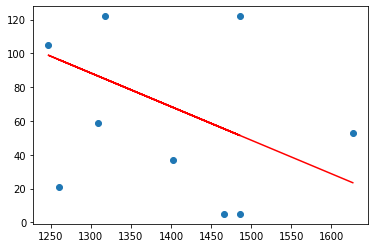

In [260]:

plt.scatter(Xs_test, ys_test)
plt.plot(Xs_test['mortality'], list(ys_pred), c='r')
print(f"Коэфицент детерминанции для южных городов {round(models.score(Xs_test, ys_test), 3)}")


In [261]:
Xs_const = sm.add_constant(Xs_train)

C:\ProgramData\ANC\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [262]:
models = sm.OLS(ys_train, Xs_const)
results = models.fit()


In [263]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     29.24
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           7.27e-05
Time:                        14:10:51   Log-Likelihood:                -75.526
No. Observations:                  17   AIC:                             155.1
Df Residuals:                      15   BIC:                             156.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        346.4741     50.376      6.878      0.0

C:\ProgramData\ANC\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Parameters:  const        346.474133
mortality     -0.198528
dtype: float64
R2:  0.6609431325736499


(array([1., 0., 1., 1., 5., 3., 2., 1., 0., 3.]),
 array([-46.92417833, -38.58447269, -30.24476704, -21.9050614 ,
        -13.56535576,  -5.22565012,   3.11405552,  11.45376116,
         19.7934668 ,  28.13317244,  36.47287808]),
 <BarContainer object of 10 artists>)

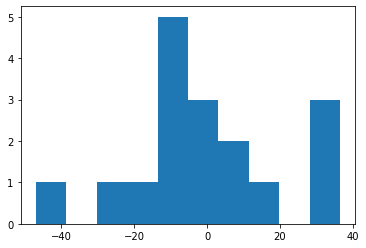

In [264]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
plt.hist(results.resid)

In [265]:
len(results.resid)

17

In [266]:
Xn = df_n[['mortality']]
yn = df_n['hardness']
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, train_size=0.7, random_state=42)

In [267]:
Xn_train.shape
yn_train.shape




(24,)

In [268]:
modeln= LinearRegression()
modeln.fit(Xn_train, yn_train)


LinearRegression()

In [269]:
yn_pred = modeln.predict(Xn_test)


print(f"""В общем виде функция линейной регрессии для северных городов: 
{chr(947)}={round(modeln.intercept_,2)}{round(modeln.coef_[0], 2)}{chr(967)}""")


В общем виде функция линейной регрессии для северных городов: 
γ=191.73-0.1χ


Коэфицент детерминанции для северных городов -0.349


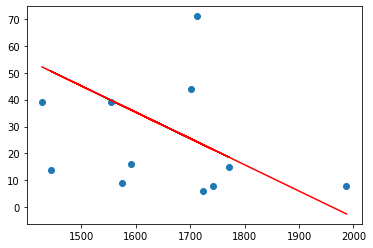

In [270]:
plt.scatter(Xn_test, yn_test)
plt.plot(Xn_test['mortality'], list(yn_pred), c='r')
print(f"Коэфицент детерминанции для северных городов {round(modeln.score(Xn_test, yn_test), 3)}")

In [271]:
Xn_const = sm.add_constant(Xn_train)
modeln = sm.OLS(yn_train, Xn_const)
resultn = modeln.fit()



C:\ProgramData\ANC\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Sat, 16 Apr 2022   Prob (F-statistic):             0.0316
Time:                        14:10:52   Log-Likelihood:                -111.11
No. Observations:                  24   AIC:                             226.2
Df Residuals:                      22   BIC:                             228.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.7280     69.297      2.767      0.0

(array([5., 3., 4., 4., 0., 2., 2., 0., 2., 2.]),
 array([-31.60341826, -23.18012614, -14.75683401,  -6.33354188,
          2.08975025,  10.51304238,  18.93633451,  27.35962664,
         35.78291877,  44.2062109 ,  52.62950303]),
 <BarContainer object of 10 artists>)

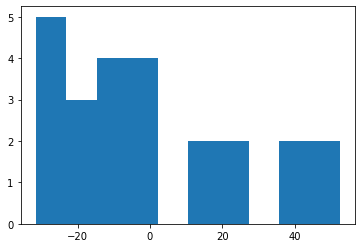

In [272]:
print(resultn.summary())
print('Parameters: ', resultn.params)
print('R2: ', resultn.rsquared)
plt.hist(resultn.resid, bins=10)

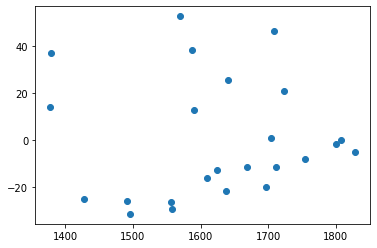

In [273]:
# посмотрим на остатки
plt.scatter(Xn_const.iloc[:, 1], resultn.resid)

Говоря о северных городах: В остатках можно выявить паттерны. Остатки расположены не хаотично и не похожи на нормальнео распределение.
Модель недостаточно правильно подобрана.

Если же говорить о южных городах, то там распределение остатков намного ближе к нормальному, но тоже имеет выбросы с правой стороны, да и для количества 17 {len(results.resid)}, сложно делать выводы. Необходимо больше данных.

В целом можно сказать что присутсвует обратная корреляция, как для северных городов, так и для южных. 
Это и показывают отрицательные коэффициенты корреляции. Чем выше жесткость воды, тем ниже смертность населения, НО мы не можем
говорить, что между этипараметры непосредсвтенно влияют друг на друга, скорей присутсвует ещё какие-нибкдь данные, которые мы не учли. 

